In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline        
import japanize_matplotlib   

**機械学習の特徴**
- 機械学習はデータが命
- ニューラルネットワークやディープラーニングは、人の介入を遠ざけることができる
- モデルの汎化性能を上げるため、訓練データで学習後、テストデータで評価する
- 過学習（overfitting）を避けることは重要な課題である

# ニューラルネットワークとは

![](image/05_neural-network.png)

## 入力層・中間層・出力層

最初の層を**入力層**、最後の層を**出力層** 、その間にある層を**中間層**または**隠れ層**という。

## 信号の伝達

$w$は重み、$x$は信号、$h()$は活性化関数。<br>
$x_0w_0$について、$x_0$は常に1であり、$x_0w_0$はバイアス（$b$）である。

$$a=b+w_1x_1+w_2x_2+\cdots+w_nx_n$$
$$y=h(a)$$

# 活性化関数

入力信号の総和がどのように活性化するかを決定する。<br><br>
多層化する恩恵を受けるために、活性化関数には非線形関数を使う必要がある。<br>
ニューラルネットワークでは滑らかに変化する関数を利用する。

## ステップ関数

パーセプトロンではニューロン間を0か1の二値の信号が流れる。

$$h(x)=\begin{cases}
    1 & (x > 0) \\
    0 & (x \leqq 0)
  \end{cases}$$

In [22]:
def step_function(x):
    return np.array(x > 0, dtype=np.int_)

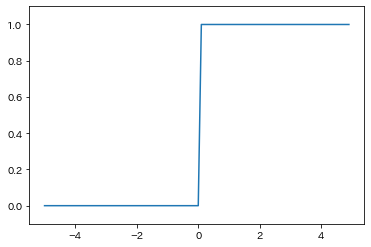

In [23]:
x = np.arange(-5.0, 5.0, 0.1) #-5.0から5.0まで0.1刻みで
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1) #y軸の範囲指定
plt.show()

## シグモイド関数

滑らかな関数。連続的な実数値の信号が流れるニューラルネットワークにおいて重要な関数。古くからニューラルネットワークに用いられてきた。<br>
2クラス分類問題における出力層の活性化関数として使われることが多い。

$$h(x)=\frac{1}{1+e^{-x}}$$

In [24]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

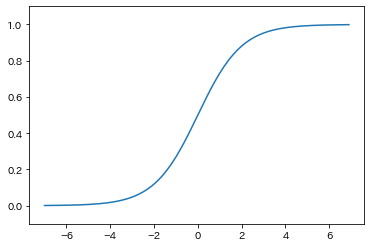

In [25]:
x = np.arange(-7.0, 7.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

## tanh関数

シグモイド関数と同じく、S字カーブを描く関数。原点対称。

$$h(x) =\dfrac{e^{x}-e^{-x}}{e^{x}+e^{-x}}$$

In [26]:
def tanh(x):
    return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))

<function matplotlib.pyplot.show(close=None, block=None)>

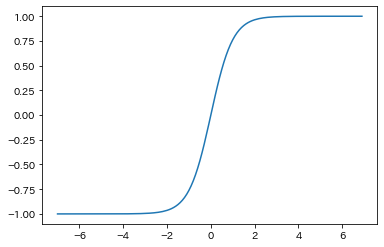

In [27]:
x = np.arange(-7.0, 7.0, 0.1)
y = tanh(x)
plt.plot(x, y)
plt.ylim(-1.1, 1.1)
plt.show

## ReLU関数

最近、ニューラルネットワークで主に用いられる関数。<br>
0以下の入力には0を返し、0より大きい入力には入力値と同じ値を出力する。

$$h(x)=\begin{cases}
    x & (x > 0) \\
    0 & (x \leqq 0)
  \end{cases}$$

In [28]:
def relu(x):
    return np.maximum(0, x)

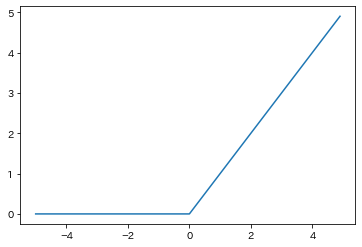

In [29]:
x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)
plt.plot(x, y)
plt.show()

## 恒等関数

入力値をそのまま出力する。回帰問題の出力層の活性化関数として利用する。出力層の活性化関数は隠れ層の活性化関数$h()$とは区別して$\sigma()$とする。

$$h(x)=x$$

In [30]:
def identity_function(x):
    return x

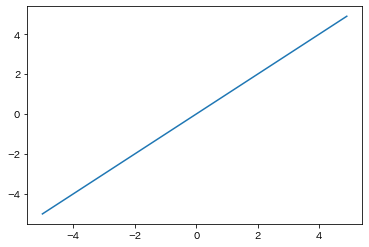

In [31]:
x = np.arange(-5.0, 5.0, 0.1)
y = identity_function(x)
plt.plot(x, y)
plt.show()

## ソフトマックス関数

他クラス分類問題の出力層の活性化関数として利用される。出力の各ニューロンが、すべての入力信号から影響を受ける。

$$y_k=\frac{\exp(a_k)}{\sum_{i=1}^{n}\exp(a_i)}$$

指数関数の値は容易に大きくなり、無限大（`inf`）となることもある。大きな値どうしで割り算をすると数値が不安定になるため、工夫が必要。

$$\begin{align}
y_k=\frac{\exp(a_k)}{\sum_{i=1}^{n}\exp(a_i)} &= \frac{C\exp(a_k)}{C\sum_{i=1}^{n}\exp(a_i)} \\\\
&= \frac{\exp(a_k+\log C)}{\sum_{i=1}^{n}\exp(a_i+\log C)} \\\\
&= \frac{\exp(a_k+C')}{\sum_{i=1}^{n}\exp(a_i+C')}
\end{align}$$

入力信号の最大値を引くことで、オーバーフローを防ぐ。

In [32]:
def softmax(a):
    c = np.max(a) #入力信号の最大値を取得
    exp_a = np.exp(a - c) #オーバーフロー対策
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

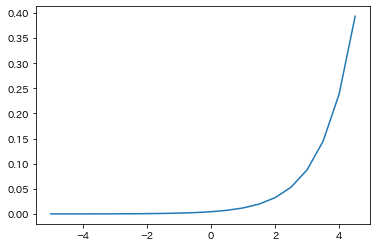

In [33]:
x = np.arange(-5.0, 5.0, 0.5)
y = softmax(x)
plt.plot(x, y)
plt.show()

ソフトマックス関数では、出力が0から1の実数値となり、また出力の総和は1になるため、出力結果を確率として解釈できる。

In [34]:
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print(y)
np.sum(y)

[0.01821127 0.24519181 0.73659691]


1.0

また指数関数 $y=e^x$ は単調に増加するため、ソフトマックス関数の適用前後で各要素の大小関係は変わらない。<br><br>
クラス分類では、出力が一番大きいニューロンに相当するクラスを識別結果とすることや、指数関数の計算の高い計算コストのために、<br>
分類問題の出力層のソフトマックス関数は省略するのが一般的。

# 実装

## 多次元配列

行列の積の計算
$$
\begin{pmatrix}
1 & 2 \\
3 & 4 
\end{pmatrix}
\begin{pmatrix}
5 & 6 \\
7 & 8 
\end{pmatrix}=
\begin{pmatrix}
19 & 22 \\
43 & 50 
\end{pmatrix}$$

In [35]:
# Pythonで実装
A = np.array([[1,2],[3,4]])
B = np.array([[5,6],[7,8]])
np.dot(A, B)

array([[19, 22],
       [43, 50]])

## ニューラルネットワークの計算

ニューラルネットワークの各層の計算は、行列の積としてまとめて行うことができる。

$a_k^{(n)}$が第$n$層目、$k$番目のニューロン、<br>
$b_k^{(n)}$が第$n$層目の、k番目のニューロンへのバイアス、<br>
$w_{kl}^{(n)}$が第$n$層目の、前層$l$番目のニューロンから次層$k$番目のニューロンへの重み、<br>
$x_k$がk番目の入力値（渡された値）、<br>
$h()$が活性化関数を表すとすると、

$$A^{(1)}=\begin{pmatrix}a_1^{(1)} & a_2^{(1)} & a_3^{(1)}\end{pmatrix},
X=\begin{pmatrix}x_1 & x_2\end{pmatrix},
B^{(1)}=\begin{pmatrix}b_1^{(1)} & b_2^{(1)} & b_3^{(1)}\end{pmatrix},
W^{(1)}=\begin{pmatrix}w_{11}^{(1)} & w_{21}^{(1)} & w_{31}^{(1)} \\ 
w_{12}^{(1)} & w_{22}^{(1)} & w_{32}^{(1)}\end{pmatrix}$$

として、第1層目の「重み付き和」$A^{(1)}$が得られ、$Z^{(1)}$が次層へ渡される。

$$A^{(1)}=XW^{(1)}+B^{(1)}$$

$$Z^{(1)}=h(A^{(1)})$$

In [36]:
# Pythonで実装
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

A1 = np.dot(X, W1) + B1
Z1 = sigmoid(A1)

print(A1)
print(Z1)

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


In [37]:
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)

print(A2)
print(Z2)

[0.51615984 1.21402696]
[0.62624937 0.7710107 ]


In [38]:
W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3)

print(A3)
print(Y)

[0.31682708 0.69627909]
[0.31682708 0.69627909]


以下で、ニューラルネットワークの全体の流れを記述する。

In [39]:
# 3層ニューラルネットワークの実装
def init_network():  #重みとバイアスの初期化
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    
    return network

def forward(network, x):  #入力から出力方向への伝達処理
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)
    
    return y

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[0.31682708 0.69627909]


## 手書き数字認識

**load_mnist関数**
- Parameters
    - `normalize` : 画像のピクセル値を0.0~1.0に正規化する
    - `one_hot_label` : Trueの場合、ラベルはone-hot配列（`[0,0,1,0,0,0,0,0,0,0]`のような配列）として返す
    - `flatten` : 画像をNumpy配列の一次元配列に平にするかどうか
- Returns
    - (訓練画像, 訓練ラベル), (テスト画像, テストラベル)

In [40]:
from source.dataset01.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = \
    load_mnist(flatten=True, normalize=False)

print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [41]:
from PIL import Image

def img_show(img):
    pil_img = Image.fromarray(np.uint8(img)) #Numpy画像データをPIL用データオブジェクトに変換
    pil_img.show()
    
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False) #一次元配列にする

img = x_train[0]
label = t_train[0]
print(label)

print(img.shape)
img = img.reshape(28, 28) #元の形状に再変形
print(img.shape)

img_show(img)

5
(784,)
(28, 28)


### 推論処理

推論処理を行うニューラルネットワークを実装する。<br><br>
入力層は784個（画像サイズ）、出力層は10個（10クラス分類）、2つの隠れ層（任意）のうち、1つ目隠れ層は50個（任意）、2つ目の隠れ層は100個（任意）のニューロンで構成される。

In [42]:
import pickle

def get_data(): #前処理
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test


def init_network(): #sample_weight.pklに保存の学習済み重みパラメータを読み込む
    with open("pickle/sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    return network


def predict(network, x): #順方向伝播
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y

In [43]:
%%time

x, t = get_data()
network = init_network()

accuracy_cnt = 0

for i in range(len(x)):
    y = predict(network, x[i])
    p= np.argmax(y) #最も確率の高い要素のインデックスを取得
    if p == t[i]:
        accuracy_cnt += 1

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352
CPU times: user 1.04 s, sys: 1.6 s, total: 2.64 s
Wall time: 1.29 s


以下で、対応する要素数が一致することを確認する。（バイアスは省略）

In [44]:
x, _ = get_data()
network = init_network()
W1, W2, W3 = network['W1'], network['W2'], network['W3']
print(x.shape)
print(x[0].shape)
print(W1.shape)
print(W2.shape)
print(W3.shape)
print(y.shape)

(10000, 784)
(784,)
(784, 50)
(50, 100)
(100, 10)
(10,)


$$
\begin{pmatrix}
x_{1\,1} & \cdots & x_{1\,784}\end{pmatrix}
\begin{pmatrix}w_{1\,1}^{(1)} & \cdots & w_{50\,1}^{(1)} \\ 
\vdots & \ddots & \vdots \\
w_{1\,784}^{(1)} & \cdots & w_{50\,784}^{(1)}\end{pmatrix}
\begin{pmatrix}w_{1\,1}^{(2)} & \cdots & w_{100\,1}^{(2)} \\ 
\vdots & \ddots & \vdots \\
w_{1\,50}^{(2)} & \cdots & w_{100\,50}^{(2)}\end{pmatrix}
\begin{pmatrix}w_{1\,1}^{(3)} & \cdots & w_{10\,1}^{(3)} \\ 
\vdots & \ddots & \vdots \\
w_{1\,100}^{(3)} & \cdots & w_{10\,100}^{(3)}\end{pmatrix}
=
\begin{pmatrix}
y_{1\,1} & \cdots & y_{1\,10}\end{pmatrix}
$$

$$784\qquad\qquad\qquad784\times50\qquad\qquad\qquad50\times100\qquad\qquad\qquad100\times10\qquad\qquad\qquad10$$

※バイアスは省略

### バッチ処理

ライブラリの多くは、大きな配列の計算を効率よく処理できるよう最適化されているため、<br>
複数の処理をまとめて行うと、処理時間を大きく短縮することができる。（バッチ処理）<br><br>
ここでは、100個の処理をまとめて行うために、`x`の形状を $100\times784$ とする。

$$
\begin{pmatrix}x_{1\,1} & \cdots & x_{1\,784} \\
\vdots & \ddots & \vdots \\
x_{100\,1} & \cdots & x_{100\,784}\end{pmatrix}
\begin{pmatrix}w_{1\,1}^{(1)} & \cdots & w_{50\,1}^{(1)} \\ 
\vdots & \ddots & \vdots \\
w_{1\,784}^{(1)} & \cdots & w_{50\,784}^{(1)}\end{pmatrix}
\begin{pmatrix}w_{1\,1}^{(2)} & \cdots & w_{100\,1}^{(2)} \\ 
\vdots & \ddots & \vdots \\
w_{1\,50}^{(2)} & \cdots & w_{100\,50}^{(2)}\end{pmatrix}
\begin{pmatrix}w_{1\,1}^{(3)} & \cdots & w_{10\,1}^{(3)} \\ 
\vdots & \ddots & \vdots \\
w_{1\,100}^{(3)} & \cdots & w_{10\,100}^{(3)}\end{pmatrix}
=
\begin{pmatrix}y_{1\,1} & \cdots & y_{1\,10} \\
\vdots & \ddots & \vdots \\
y_{100\,1} & \cdots & y_{100\,10}\end{pmatrix}
$$

$$100\times784\qquad\qquad\qquad784\times50\qquad\qquad\qquad50\times100\qquad\qquad\qquad100\times10\qquad\qquad\qquad100\times10$$

※バイアスは省略

In [45]:
%%time

x, t = get_data()
network = init_network()

batch_size = 100 #バッチの数
accuracy_cnt = 0

for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p= np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p == t[i:i+batch_size]) #比較演算子（==）によってブーリアン配列を作成

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352
CPU times: user 217 ms, sys: 328 ms, total: 545 ms
Wall time: 309 ms


バッチ処理の方が、約4〜5倍処理が速い。

# 損失関数（loss function）

モデルの悪さを表す関数で、モデルの正確性の評価のために用いる。<br>

最適なパラメータを探索する際、損失関数の値が小さくなるような場所を探す。<br>
損失関数も対する微分の値が、0となるところで、パラメータ更新は終わる（03_Applied_Mathematics「最急降下法」）。

認識精度（断続的）をそのまま正確性を表す指標としてしまうと、微分の値がほとんど全ての場所で0になってしまい、正しく計算されないので、損失関数（連続的）を利用する。

## 二乗和誤差（sum of squared error）

$$E=\dfrac{1}{2}\sum _{k}\left( y_{k}-t_{k}\right) ^{2}$$
$y_k$:出力結果、$t_k$:教師データ、$k$:データ次元数

In [46]:
def sum_squared_error(y, t): #y、tはNumpy配列
    return 0.5 * np.sum((y - t)**2)

#2が正解
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0] #one-hot表現

#2の確率が最大
y1 = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
print(sum_squared_error(np.array(y1), np.array(t)))

#7の確率が最大
y2 = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
print(sum_squared_error(np.array(y2), np.array(t)))

0.09750000000000003
0.5975


正しく正解を予想した1つ目の二乗和誤差の方が小さく、出力結果は教師データにより適合していることを示す。

## 交差エントロピー誤差（cross entropy error）

$$E=-\sum _{k}t_{k}\log y_{k}$$
$y_k$:出力結果、$t_k$:教師データ（one-hot表現）、$k$:データ次元数

$t_k$について、正解ラベルでないインデックスは$0$だから、このとき $t_{k}\log y_{k}=0$<br>
正解ラベルのインデックスは$1$だから、このとき $t_{k}\log y_{k}=\log y_k$<br><br>
すなわち、「正解ラベルに対応する出力の自然対数に$-1$をかけた値」に等しい。

In [47]:
def cross_entropy_error(y, t):
    delta = 1e-7 # 1*10**(-7) = 0.0000001
    return -np.sum(t * np.log(y + delta)) #np.log(0)は-inf（負の無限大）になるため、微小な値deltaを加える

#2が正解
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0] #one-hot表現

#2の確率が最大
y1 = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
print(cross_entropy_error(np.array(y1), np.array(t)))

#7の確率が最大
y2 = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
print(cross_entropy_error(np.array(y2), np.array(t)))

0.510825457099338
2.302584092994546


正解ラベルに対応するインデックスの出力数値が大きい、1つ目の損失関数の方が小さく、出力結果は教師データにより適合していることを示す。

# ミニバッチ学習

大きなデータの場合、全データを対象に処理をすると時間がかかりすぎ、現実的でない。<br>
そのために、一部を選び出し、全体の近似とする。

以下では、データがバッチとしてまとめて入力される場合と、データがひとつの場合の両方に対応した、交差エントロピー誤差計算の実装をする。

In [48]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    
    batch_size = y.shape[0]
    return -np.sum(t * np.log(y + 1e-7)) / batch_size

教師データがラベル（one-hot表現ではなく「2」や「7」など）で与えられたときは、以下のように実装する。

In [49]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

# ニューラルネットワークに対する勾配

$$W=\begin{pmatrix} w_{11} & w_{2} & w_{13} \\ w_{21} & w_{22} & w_{23} \end{pmatrix}$$

$$\dfrac{\partial L}{\partial W}=\begin{pmatrix} \dfrac{\partial L}{\partial w _{11}} & \dfrac{\partial L}{\partial w_{12}} & \dfrac{\partial L}{\partial w_{13}} \\
\dfrac{\partial L}{\partial w_{21}} & \dfrac{\partial L}{\partial w_{22}} & \dfrac{\partial L}{\partial w_{23}} \end{pmatrix}$$
$W$:重み、$L$:損失関数、$\dfrac{\partial L}{\partial W}$:勾配

In [50]:
from source.common01.functions import softmax, cross_entropy_error
from source.common01.gradient import numerical_gradient


class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3) #形状2×3の重みパラメータをひとつだけインスタンス変数として持つ

    def predict(self, x):
        return np.dot(x, self.W)

    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)

        return loss

`simpleNet`クラスには、予測メソッド`predict(x)`と、損失関数を求めるメソッド`loss(x, t)`がある。

In [51]:
net = simpleNet()
print(net.W) #重みパラメータ
print()

x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)
print(np.argmax(p)) #最大値のインデックス
print()

t = np.array([0, 0, 1]) #正解ラベル
print(net.loss(x, t))

[[-0.03905876  0.01545276  0.52971001]
 [-0.46102582 -0.95070393  2.56754151]]

[-0.43835849 -0.84636188  2.62861337]
2

0.07466620800165799


勾配を求める。

In [52]:
def f(W):
    return net.loss(x, t)

dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.02592717  0.01724096 -0.04316813]
 [ 0.03889075  0.02586144 -0.06475219]]


簡単な関数は、`lambda`を使って記述できる。

In [53]:
f = lambda w: net.loss(x, t)
dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.02592717  0.01724096 -0.04316813]
 [ 0.03889075  0.02586144 -0.06475219]]


# 学習アルゴリズム

**TwoLayerNetクラスのメソッド**

| メソッド | 説明 | 引数 |
|:------|:----|:----|
| `init(self, input_size, hidden_size, output_size)` |初期化|入力ニューロン数, 中間ニューロン数, 出力ニューロン数|
| `predict(self, x)` |認識（推論）|画像データ|
| `loss(self, x, t`) |損失関数|画像データ, 正解ラベル|
| `accuracy(self, x, t)` |認識精度|画像データ, 正解ラベル|
| `numerical_gradient(self, x, t)` |重みパラメータに対する勾配を求める|画像データ, 正解ラベル|
| `gradient(self, x, t)` |誤差逆伝播法|画像データ, 正解ラベル|

In [54]:
import numpy as np
from source.common01.layers import *
from source.common01.gradient import numerical_gradient
from collections import OrderedDict


class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std = 0.01):
        # 重みの初期化
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size) 
        self.params['b2'] = np.zeros(output_size)

        # レイヤの生成
        self.layers = OrderedDict()
        self.layers['Affine1'] = Affine(self.params['W1'], self.params['b1'])
        self.layers['Relu1'] = Relu()
        self.layers['Affine2'] = Affine(self.params['W2'], self.params['b2'])

        self.lastLayer = SoftmaxWithLoss()
        
    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)
        
        return x
        
    # x:入力データ, t:教師データ
    def loss(self, x, t):
        y = self.predict(x)
        return self.lastLayer.forward(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        if t.ndim != 1 : t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    # x:入力データ, t:教師データ
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
        
    def gradient(self, x, t):
        # forward
        self.loss(x, t)

        # backward
        dout = 1
        dout = self.lastLayer.backward(dout)
        
        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)

        # 設定
        grads = {}
        grads['W1'], grads['b1'] = self.layers['Affine1'].dW, self.layers['Affine1'].db
        grads['W2'], grads['b2'] = self.layers['Affine2'].dW, self.layers['Affine2'].db

        return grads

`numerical_gradient`は数値微分によりパラメータの勾配を計算する。<br>
`gradient`は誤差逆伝播法によりパラメータの勾配を計算する（次章）。<br><br>
誤差逆伝播法による結果は、数値微分による結果と**ほぼ同じ**であり、**高速**に処理できる利点がある。<br>
以下では、誤差逆伝播法（次章で詳しく）を利用する。

1エポックは、学習において訓練データを全て使い切ったときの回数に対応する。<br>
10000個の訓練データに対して100個のミニバッチで学習する場合、確率的勾配降下法を100回繰り返すと、全ての訓練データを見たことになる。<br>
この場合、100回=1エポックとなる。

汎化性能を獲得できているか、過学習を起こしていないかを確認するため、テストデータに対しての認識精度もとても大切である。<br>
1エポックごとに、訓練データとテストデータの認識精度を記録する。

In [55]:
from source.dataset01.mnist import load_mnist

# データの読み込み
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)
train_size = x_train.shape[0]

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

#ハイパーパラメータ
iters_num = 10000  # 繰り返しの回数を適宜設定する
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []
iter_per_epoch = max(train_size / batch_size, 1) #iエポックあたりの繰り返し数

for i in range(iters_num):
    #ミニバッチの取得
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 勾配の計算
    #grad = network.numerical_gradient(x_batch, t_batch) #数値微分 #低速
    grad = network.gradient(x_batch, t_batch) #誤差逆伝播法 #高速
    
    # パラメータの更新
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    #1エポックごとに認識精度を計算
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))
    
print("Done")

train acc, test acc | 0.09785, 0.0979
train acc, test acc | 0.9029833333333334, 0.9056
train acc, test acc | 0.9242166666666667, 0.9268
train acc, test acc | 0.9319333333333333, 0.933
train acc, test acc | 0.9450333333333333, 0.9438
train acc, test acc | 0.9510666666666666, 0.9478
train acc, test acc | 0.9548333333333333, 0.9522
train acc, test acc | 0.9600833333333333, 0.9564
train acc, test acc | 0.9635166666666667, 0.9586
train acc, test acc | 0.9662166666666666, 0.9629
train acc, test acc | 0.9676166666666667, 0.9611
train acc, test acc | 0.9709333333333333, 0.9652
train acc, test acc | 0.9725166666666667, 0.9677
train acc, test acc | 0.9742166666666666, 0.9679
train acc, test acc | 0.9756666666666667, 0.9683
train acc, test acc | 0.9767666666666667, 0.9686
train acc, test acc | 0.9778833333333333, 0.9687
Done


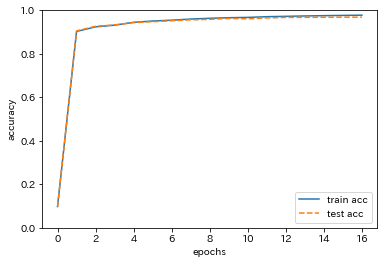

In [56]:
# グラフの描画
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

エポックが進むにつれて、認識精度は向上している。<br>
また訓練データとテストデータの精度には差がほとんどなく、過学習が起きていない。